# Enter Student Name & ID

In [2]:
student_id =  99101943 #@param {type:"integer"}
student_name = "Matin Alinejad" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 99101943
your name: Matin Alinejad


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [5]:
import numpy as np

In [6]:
def myPCA(X, num_components):
    # Step 1: Standardize the dataset (mean = 0 and variance = 1)
    X_meaned = X - np.mean(X, axis = 0)
    
    # Step 2: Calculate the covariance matrix of the mean-centered data
    covariance_matrix = np.cov(X_meaned, rowvar=False)
    
    # Step 3: Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Step 4: Sort the eigenvalues and their corresponding eigenvectors
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_index]
    sorted_eigenvectors = eigenvectors[:, sorted_index]
    
    # Step 5: Select the top 'num_components' eigenvectors (principal components)
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]
    
    # Step 6: Transform the data
    X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()
    
    return X_reduced, sorted_eigenvalues, sorted_eigenvectors


### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

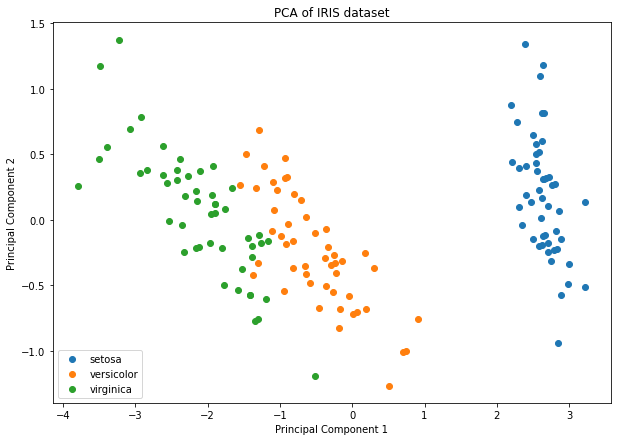

In [12]:
# myPCA on IRIS 
# Load the IRIS dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply myPCA to reduce the dataset to 2 dimensions
num_components = 2
X_reduced, eigenvalues, eigenvectors = myPCA(X, num_components)

# Plot the results
plt.figure(figsize=(10, 7))
for target in np.unique(y):
    indices = y == target
    plt.scatter(X_reduced[indices, 0], X_reduced[indices, 1], label=iris.target_names[target])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of IRIS dataset')
plt.legend()
plt.show()

## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `
### Eigenfaces and PCA

#### What are Eigenfaces?
Eigenfaces are a set of eigenvectors used in the computer vision problem of human face recognition. They are derived from the covariance matrix of the probability distribution of the high-dimensional vector space of possible faces of human beings. Essentially, eigenfaces are the principal components of the distribution of faces, a set of features that characterize the variation among faces.

#### How are Eigenfaces Related to PCA?
Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction while preserving as much variability as possible in the dataset. In the context of face recognition:

1. **Data Representation**:
   - Each face image is represented as a vector by concatenating its pixel values. For example, a 100x100 pixel image becomes a 10,000-dimensional vector.
   
2. **Mean Centering**:
   - All face vectors are mean-centered by subtracting the average face vector from each face vector.

3. **Covariance Matrix**:
   - The covariance matrix of these mean-centered vectors is computed.

4. **Eigenvectors and Eigenvalues**:
   - Eigenvectors and eigenvalues of the covariance matrix are computed. The eigenvectors represent the directions of maximum variance (principal components), and the eigenvalues represent the magnitude of variance in these directions.

5. **Eigenfaces**:
   - The top eigenvectors (those with the highest eigenvalues) are selected, and these eigenvectors are reshaped back into the original image shape. These reshaped eigenvectors are referred to as "eigenfaces."

6. **Face Recognition**:
   - Any face can be represented as a linear combination of these eigenfaces. The eigenfaces act as a basis set for the face images, allowing the face images to be projected into a lower-dimensional space for comparison and recognition.

### Applying PCA on the Faces Dataset

We'll extract the dataset, apply PCA to reduce the dimensionality, and visualize the results.

### Steps to Apply PCA on the Faces Dataset

1. **Extract the dataset**.
2. **Load the images and preprocess them**.
3. **Apply PCA** to find the eigenfaces.
4. **Visualize the eigenfaces**.

### 2.2 Read the given dataset and create train and test matrices. 
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

In [13]:
!pip install opencv-python

In [34]:
import zipfile
import os

# Path to the zip file and extraction directory
zip_file_path = 'FacesDataset1.zip'
extraction_path = 'FacesDataset1'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# Verify the extraction
extracted_folders = os.listdir(extraction_path)
print(f"Extracted folders: {extracted_folders}")

Extracted folders: ['ORL']


In [35]:
# Function to print the directory structure
def print_directory_structure(root_dir):
    for root, dirs, files in os.walk(root_dir):
        level = root.replace(root_dir, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f"{indent}{os.path.basename(root)}/")
        sub_indent = ' ' * 4 * (level + 1)
        for f in files:
            print(f"{sub_indent}{f}")

# Print the directory structure
print_directory_structure(extraction_path)

FacesDataset1/
    ORL/
        s1/
            1.bmp
            10.bmp
            2.bmp
            3.bmp
            4.bmp
            5.bmp
            6.bmp
            7.bmp
            8.bmp
            9.bmp
            Thumbs.db
        s10/
            1.bmp
            10.bmp
            2.bmp
            3.bmp
            4.bmp
            5.bmp
            6.bmp
            7.bmp
            8.bmp
            9.bmp
            Thumbs.db
        s11/
            1.bmp
            10.bmp
            2.bmp
            3.bmp
            4.bmp
            5.bmp
            6.bmp
            7.bmp
            8.bmp
            9.bmp
            Thumbs.db
        s12/
            1.bmp
            10.bmp
            2.bmp
            3.bmp
            4.bmp
            5.bmp
            6.bmp
            7.bmp
            8.bmp
            9.bmp
            Thumbs.db
        s13/
            1.bmp
            10.bmp
            2.bmp
            3.bmp
            4.bmp
         

In [39]:
import os
import cv2
import numpy as np

# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in sorted(os.listdir(folder)):
        if filename.endswith('.bmp'):  # Ensure we only process BMP files
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
            if img is not None:
                images.append(img.flatten())  # Flatten the image
    return images

# Initialize lists for training and testing data and labels
X_train = []
y_train = []
X_test = []
y_test = []

# Root path for the dataset
root_path = os.path.join('FacesDataset1', 'ORL')

# Load images and create train-test split
for label, folder_name in enumerate(sorted(os.listdir(root_path))):
    folder_path = os.path.join(root_path, folder_name)
    if os.path.isdir(folder_path):  # Ensure it's a directory
        images = load_images_from_folder(folder_path)
        
        if len(images) >= 10:  # Ensure there are at least 10 images
            # First 5 images for training, second 5 images for testing
            X_train.extend(images[:5])
            y_train.extend([label] * 5)
            X_test.extend(images[5:])
            y_test.extend([label] * 5)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Print the shapes of the resulting arrays
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (200, 2304)
y_train shape: (200,)
X_test shape: (200, 2304)
y_test shape: (200,)


### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

X_train_pca shape: (200, 50)
X_test_pca shape: (200, 50)


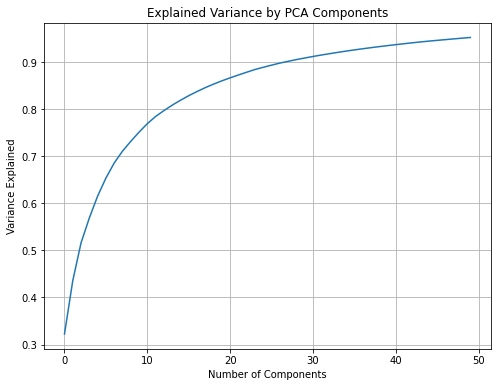

In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Number of components for PCA
num_components = 50

# Perform PCA on training data
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)

# Transform the test data using the same PCA model
X_test_pca = pca.transform(X_test)

# Print the shapes of the PCA-transformed data
print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")

# Visualize the explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

# Initialize the LDA model
lda = LDA()

# Train the LDA model on the PCA-transformed training data
lda.fit(X_train_pca, y_train)

# Predict the labels of the test data
y_pred = lda.predict(X_test_pca)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of LDA classifier on PCA-transformed data: {accuracy:.2f}")

Accuracy of LDA classifier on PCA-transformed data: 0.92


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


Number of PCA components: 40, Accuracy: 0.92
Number of PCA components: 50, Accuracy: 0.92
Number of PCA components: 60, Accuracy: 0.92
Number of PCA components: 70, Accuracy: 0.91
Number of PCA components: 80, Accuracy: 0.92
Number of PCA components: 90, Accuracy: 0.94
Number of PCA components: 100, Accuracy: 0.94


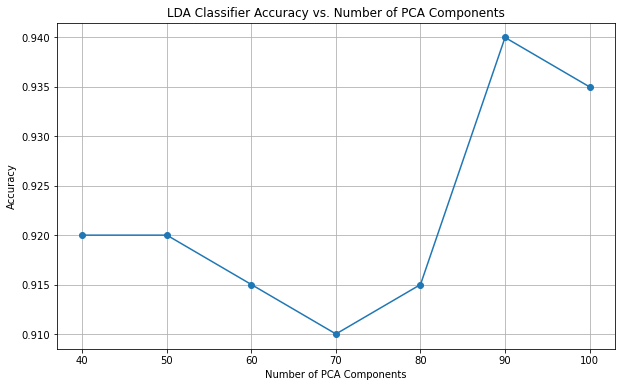

In [42]:
# List to store the accuracies for different PCA dimensions
accuracies = []

# List of different PCA dimensions to try
pca_dimensions = range(40, 101, 10)

for num_components in pca_dimensions:
    # Perform PCA with the current number of components
    pca = PCA(n_components = num_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Train the LDA model on the PCA-transformed training data
    lda = LDA()
    lda.fit(X_train_pca, y_train)
    
    # Predict the labels of the test data
    y_pred = lda.predict(X_test_pca)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    print(f"Number of PCA components: {num_components}, Accuracy: {accuracy:.2f}")

# Plotting the results
plt.figure(figsize = (10, 6))
plt.plot(pca_dimensions, accuracies, marker = 'o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('LDA Classifier Accuracy vs. Number of PCA Components')
plt.grid(True)
plt.show()

Based on the results, we can analyze the accuracy of the LDA classifier with varying PCA dimensions:

- **40 components**: 0.92
- **50 components**: 0.92
- **60 components**: 0.92
- **70 components**: 0.91
- **80 components**: 0.92
- **90 components**: 0.94
- **100 components**: 0.94

### Analysis:
- The accuracy remains relatively stable around 0.92 for PCA components between 40 and 80, with a slight dip at 70 components.
- The accuracy increases to 0.94 for 90 and 100 components.

### Determining the Sufficient Number of Features:
- **Accuracy Plateau**: The accuracy doesn't significantly increase beyond 90 components, suggesting that increasing the number of components beyond this point yields diminishing returns.
- **Dimensionality Trade-Off**: A higher number of components (like 100) might capture more variance but also increase computational complexity and risk overfitting.

### Conclusion:
- **Optimal Range**: Based on the results, using around 90 PCA components seems to balance capturing sufficient variance while maintaining high accuracy. The slight increase in accuracy at 90 components indicates this is a good choice.
- **Sufficient Features**: 90 components are likely sufficient, capturing most of the variance and providing the highest accuracy observed.

Therefore, we can conclude that **90 PCA components** are sufficient for training the LDA classifier on this dataset while achieving high accuracy. This provides a good trade-off between reducing dimensionality and maintaining model performance.